In [ ]:
from google.colab import files
upload = files.upload() 

Saving data531.csv to data531.csv


In [ ]:
import pandas as pd # Trabaljar com data set
import numpy as np # trabalhar com arrays e vetores
from sklearn.preprocessing import MinMaxScaler, LabelEncoder # Faz escalonamento /altera valores categorics para numericos # Preprocessamento
from sklearn.model_selection import train_test_split # faz a divisão de treino e teste de classficação
from sklearn.metrics import confusion_matrix, accuracy_score # demonstra a precisaão e compração entre os algoritmos 
from sklearn.naive_bayes import GaussianNB # aplica o algoritmo Naive Bayes
import seaborn as sns # melhoria dos layouts de gráficos 
import matplotlib.pyplot as plt # plotar dados e gráficos 
from sklearn.svm import SVC # importa o algoritmo Supoort Vetor Machine,  indentifica a fronteira dos dados, hiperplano de separação   

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nomeArquivo = "data531.csv" 
dataset = pd.read_csv(nomeArquivo, sep=",") #realiza a leitura do banco de dados, indicando separação de virgulas. 
dataset2 =pd.read_csv("data531.csv")



In [ ]:
dataset.head(10)

In [ ]:
dataset.shape

(617, 76)

In [ ]:
dataset.isnull().sum () # somando os valores NaN do data set.

_id                0
ccf                0
age                0
sex                0
pain location      0
                ... 
dummy 10          19
dummy 11          16
dummy 12         306
dummy 13         498
dummy 14           0
Length: 76, dtype: int64

In [ ]:
dataset.info()

In [ ]:
dataset.fillna(dataset.mean(),inplace=True)# alterando para a media de cada coluna todos os valores nulos, inplace = True substitui todos os valores presentes nos dados

In [ ]:
dataset.loc[dataset["age"],"age"].mean() #media da idade serve para todas as colunas

46.53970826580227

In [ ]:
dataset.head(10)

,_id,ccf,age,sex,pain location,pain w exertion,relieved after rest,pncaden,chest pain type,resting bp s,hypertension,cholesterol,smoker,cigarettes per day,years of smoking,fasting blood sugar,diabetes,family hist,resting ecg,ekg month,ekg day,ekg yr,digitalis,beta blocker,nitrates,calcium channel blocker,diuretic,exercise protocol,duration of exercise,thaltime,mets achieved,max heart rate,resting heart rate,peak exercise bp 1,peak exercise bp 2,dummy 1,resting bp d,exercise angina,xhypo,oldpeak,ST slope,ST height at rest,ST heaight at peak,flouroscopy,dummy 2,dummy 3,resting ejection fraction,rest wall motion abnormality,exercise ejection fraction,exercsie wall motion,thal,dummy 4,dummy 5,dummy 6,cath month,cath day,cath yr,target,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist,dummy 7,dummy 8,dummy 9,dummy 10,dummy 11,dummy 12,dummy 13,dummy 14
0,1254,0,40,1,1,0,0.0,NaN,2,140.0,0.0,289.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,12.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,150.000000,18.0,6.428755,7.0,172.0,86.0,200.0,110.0,140.0,86.0,0.0,0.0,0.0,1.932039,26.0,20.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,12.0,20.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
1,1255,0,49,0,1,0,0.0,NaN,3,160.0,1.0,180.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,11.0,16.0,84.0,0.0,0.0,0.0,0.0,0.0,57.229703,10.0,9.000000,7.0,156.0,100.0,220.0,106.0,160.0,90.0,0.0,0.0,1.0,2.000000,14.0,13.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,11.0,20.0,84.0,1,1.555556,1.464567,2.000000,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
2,1256,0,37,1,1,0,0.0,NaN,2,130.0,0.0,283.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,1.0,11.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,100.000000,10.0,6.428755,5.0,98.0,58.0,180.0,100.0,130.0,80.0,0.0,0.0,0.0,1.932039,17.0,14.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,11.0,26.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
3,1257,0,48,0,1,1,1.0,NaN,4,138.0,0.0,214.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,9.0,21.0,84.0,0.0,0.0,0.0,0.0,0.0,50.000000,5.0,4.000000,4.0,108.0,54.0,210.0,106.0,138.0,86.0,1.0,0.0,1.5,2.000000,19.0,22.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,9.0,30.0,84.0,3,1.555556,2.000000,1.280323,1.202346,2.000000,1.114458,1.187861,1.067278,2.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
4,1258,0,54,1,1,0,1.0,NaN,3,150.0,0.0,174.579216,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,7.0,25.0,84.0,0.0,0.0,1.0,1.0,0.0,25.000000,2.0,6.428755,3.0,122.0,74.0,130.0,100.0,150.0,90.0,0.0,1.0,0.0,1.932039,13.0,9.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,7.0,30.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.000000,1.114458,1.187861,1.067278,1.00000,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
5,1259,0,39,1,1,0,1.0,NaN,3,120.0,0.0,339.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,4.0,18.0,84.0,0.0,0.0,0.0,0.0,0.0,175.000000,19.0,6.428755,8.0,170.0,86.0,198.0,100.0,120.0,80.0,0.0,0.0,0.0,1.932039,20.0,21.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,4.0,22.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067278,1.47043,1.207493,1.0,1.0,1.0,1.0,1.0,27.623119,5.869748,name
6,1260,0,45,0,0,1,0.0,NaN,2,130.0,0.0,237.000000,0.517391,22.133663,23.952632,0.0,0.944444,0.482051,0.0,11.0,3.0,84.0,0.0,0.0,0.0,0.0,0.0,100.000000,10.0,6.428755,10.0,170.0,90.0,200.0,106.0,130.0,84.0,0.0,0.0,0.0,1.932039,11.0,11.0,1.545455,NaN,0.0,0.531071,1.033333,0.55,0.2,5.690141,1.284615,0.295455,0.0,12.0,4.0,84.0,0,1.555556,1.464567,1.280323,1.202346,1.400524,1.114458,1.187861,1.067

In [ ]:
data_set_array = np.array(dataset) # Criando uma variável do tipo array para preencher com o DAtaSet agora do tipo array

In [ ]:
#criando a saida com a coluna Target, para que seja nosso y
targety = data_set_array[:,57] # valor de saída
targety = targety.astype("int") #indica o tipo de dados que queremos transformar, nesse caso o array
print(targety)

[0 1 0 3 0 0 0 0 1 0 0 3 0 3 0 0 1 0 1 1 0 0 0 3 0 0 0 0 0 0 3 0 1 3 0 0 1
 0 0 0 0 4 0 0 3 0 0 0 0 1 2 4 0 0 0 0 1 1 0 3 0 0 0 1 0 0 0 0 3 0 1 0 2 0
 2 0 2 0 0 1 0 0 1 0 2 3 3 0 2 0 0 0 0 2 0 2 0 0 0 0 4 0 2 1 1 0 0 0 0 0 0
 2 0 0 0 1 1 1 0 1 3 0 0 4 0 0 0 0 0 0 0 1 3 3 0 1 0 0 2 1 4 4 4 0 3 0 0 0
 0 2 0 0 0 0 0 4 2 0 3 0 3 4 0 0 0 0 3 4 0 0 0 0 0 0 0 4 4 3 0 0 0 1 0 3 0
 0 2 0 1 0 3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 2 0 0 0 2
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 4 3 2 2 0 2 3 0 1 0 2 2 2 3 4 1 0 0 3 0 0 0
 0 0 0 0 2 3 1 0 3 0 2 0 0 0 1 0 0 0 3 2 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 3 4 2 1 0 4 1 2 2 1 0 1 1 0 3 2 1 0 1 1 1 3 1 1 1 2 2 1 1 0 1 2 1 1 1
 0 2 2 1 0 3 2 1 3 1 1 2 3 1 2 2 3 1 1 2 2 4 4 2 1 3 1 1 3 1 2 2 0 3 2 3 2
 3 3 3 1 1 3 1 3 3 3 3 3 3 4 1 2 1 2 2 2 2 2 1 3 1 2 2 2 1 2 3 1 1 3 2 1 3
 3 1 3 1 3 1 3 2 3 1 2 0 2 1 0 0 3 0 3 1 0 1 1 1 1 0 4 1 0 0 2 1 3 0 2 2 2
 1 1 3 3 3 3 3 2 3 2 0 1 0 3 1 3 0 4 2 1 0 2 0 1 0 2 0 1 2 2 3 0 1 0 2 1 4
 2 2 3 1 1 1 0 2 0 3 3 1 

Iniciar a previsão


In [ ]:
#dados coletados pelos sensores, CRIA  NO ARRAY COM O DADOS ADVINDOS DOS ITENS RELACIONADOS A SENSORES
data_set_sensores = np.column_stack((
    data_set_array[:,11], # pressão sanguinia
    data_set_array[:,33], # freq max atingida
    data_set_array[:,34], # frea  car repouso
    data_set_array[:,35], # pico de pressão sanguinea exercício
    data_set_array[:,36], # pico de pressão sanguinea exercícios
    data_set_array[:,38]  # pressão sangui em repouso 
))
data_set_sensores

array([[289.0, 200.0, 110.0, 140.0, 86.0, 0.0],
       [180.0, 220.0, 106.0, 160.0, 90.0, 0.0],
       [283.0, 180.0, 100.0, 130.0, 80.0, 0.0],
       ...,
       [223.0, 210.0, 100.0, 122.0, 70.0, 0.0],
       [385.0, 173.46570397111913, 91.64440433212997, 132.37275985663084,
        82.80465949820788, 0.028622540250447227],
       [254.0, 164.0, 110.0, 120.0, 80.0, 0.0]], dtype=object)

In [ ]:
#data set com dados médicos do paciente CRIA UM ARRAY COM O DADOS ADVINDOS DOS DOS MÉDICOS
data_medicos = np.column_stack((
    data_set_array[:,4], #localização da dor
    data_set_array[:,6], # alívio após cansaço 
    data_set_array[:,9], # tipo de dor
    data_set_array[:,39], # angina induzida pelo exercício
    dataset.age,
    dataset.sex,
    dataset.hypertension
))
print (data_medicos)

[[1 0.0 140.0 ... 40 1 0.0]
 [1 0.0 160.0 ... 49 0 1.0]
 [1 0.0 130.0 ... 37 1 0.0]
 ...
 [1 1.0 122.0 ... 55 1 1.0]
 [1 1.0 132.37275985663084 ... 58 1 0.0]
 [1 0.0 120.0 ... 62 1 1.0]]


In [ ]:
#concatenar as duas bases de dados
dataset_paciente = np.concatenate((data_set_sensores,data_medicos),axis = 1)
print(dataset_paciente)

[[289.0 200.0 110.0 ... 40 1 0.0]
 [180.0 220.0 106.0 ... 49 0 1.0]
 [283.0 180.0 100.0 ... 37 1 0.0]
 ...
 [223.0 210.0 100.0 ... 55 1 1.0]
 [385.0 173.46570397111913 91.64440433212997 ... 58 1 0.0]
 [254.0 164.0 110.0 ... 62 1 1.0]]


In [ ]:
dataset_paciente.shape

(617, 13)

In [ ]:
#separar os valores como dados de train and test
X_train, X_test, y_train,y_test = train_test_split(dataset_paciente,targety, random_state = 223 )


In [ ]:
#Criar objeto para a utilziação do SVM função SVC
modelSVM = SVC(kernel= "linear") # transformação que serão utilizados nos dados, os dados devem ser linearmente separdos TESTAR com BINOMINAL POLINOMIAL

In [ ]:
modelSVM.fit(X_train,y_train) #criando a tabela ou função SVM, modelo de treinamento 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 **Analisando a performance do modelo**

In [ ]:
previsao = modelSVM.predict(X_test) #realizando o modelo de previsão

In [ ]:
#accuracy do modelo de previsão 
accuracy = accuracy_score(y_test,previsao)
percentual = round(accuracy*100)
print("A accurancia do modelo SVM é de {},\n sendo um percentual de {}  ".format(accuracy, round(percentual)))

A accurancia do modelo SVM é de 0.5419354838709678,
 sendo um percentual de 54.0  


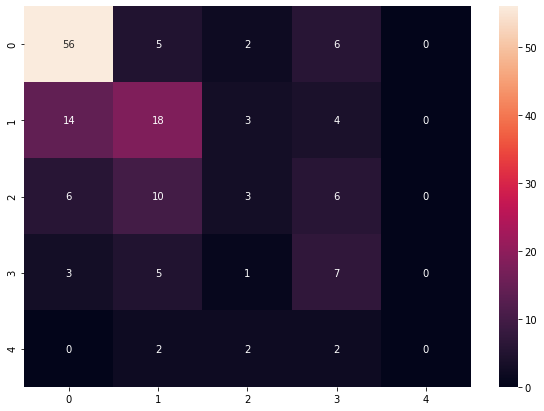

In [ ]:
#Criando a matriz de cofusão 
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test,previsao) #gera a matrix de confusão
df_cm = pd.DataFrame(cm, index= [i for i in "01234"], columns=[i for i in "01234"]) # cria o df com as classes
plt.figure(figsize=(10,7)) #indica o tamanho da figura 
sn.heatmap (df_cm, annot= True ) #plota a figura 



**Modificar o DAta **

In [ ]:
#vamos escolher apenas 13 atributos para realizar previsão de doenças cardiácas 
dataset_to_array = np.array(dataset)
label = dataset_to_array[:,57]
label = label.astype("int") # transforma os valores do label em inteiros
label[label>0] = 1 #quando os dados estão 0 é saúdavel, no demais doente, estamos equalizando todos para 1 doente 
label




array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#dividir o teste apenas com os valores do paciente sem co
x_train, x_test, Y_train, Y_test = train_test_split (dataset_paciente, label, random_state= 223) #agora utilziando apenas os valores de 0 e 1

In [ ]:
#criando o bjeto de SVM com o SVC
model2SVM = SVC(kernel="linear") #posso escolher o KErnel polinominal 


In [ ]:
#criando o modelo de treinamento  
modelSVM.fit(x_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#previsao do novo modelo
predict = modelSVM.predict(x_test)

In [ ]:
#verificando a accuracy do novo modelo
accuracyLabel = accuracy_score(Y_test,predict)
perce = round(accuracyLabel*100)
print("A accuracia utilziando o SVM foi de {}, \n com um percentual de {} .".format(accuracyLabel, perce))

A accuracia utilziando o SVM foi de 0.7419354838709677, 
 com um percentual de 74.0 .


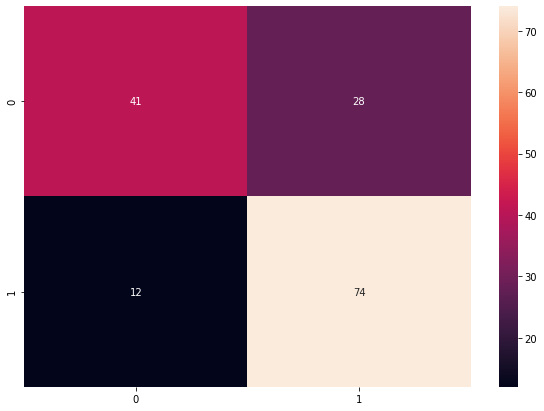

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#criando a matrix de confusão
matrixLabel = confusion_matrix(Y_test,predict)
matrixLabel = pd.DataFrame(matrixLabel)
plt.figure(figsize=(10,7))
sn.heatmap(matrixLabel, annot=True)




